### Variables
- 'Año': Representa el año en que ocurrió la defunción.
- 'Fecha_def': Indica la fecha en que se registró la defunción.
- 'Sexo': Indica el sexo de la persona fallecida.
- 'Edad': Muestra la edad de la persona fallecida en formato de texto.
- 'Edad_num': Representa la edad de la persona fallecida como un valor numérico.
- 'Cod_com_res': Es el código de la comuna de residencia de la persona fallecida.
- 'Com_resi': Indica el nombre de la comuna de residencia de la persona fallecida.
- 'Reg_resi': Representa la región de residencia de la persona fallecida.
- 'Causa_bas_def': Es el código de la causa básica de la defunción.
- 'CAPITULO_DIAG1': Código del capítulo de diagnóstico 1.
- 'GLOSA_CAPITULO_DIAG1': Descripción del capítulo de diagnóstico 1.
- 'CODIGO_GRUPO_DIAG1': Código del grupo de diagnóstico 1.
- 'GLOSA_GRUPO_DIAG1': Descripción del grupo de diagnóstico 1.
- 'CODIGO_CATEGORIA_DIAG1': Código de la categoría de diagnóstico 1.
- 'GLOSA_CATEGORIA_DIAG1': Descripción de la categoría de diagnóstico 1.
- 'CODIGO_SUBCATEGORIA_DIAG1': Código de la subcategoría de diagnóstico 1.
- 'GLOSA_SUBCATEGORIA_DIAG1': Descripción de la subcategoría de diagnóstico 1.
- 'DIAG2': Código del diagnóstico 2.
- 'CAP_DIAG2': Código del capítulo de diagnóstico 2.
- 'GLOSA_CAPITULO_DIAG2': Descripción del capítulo de diagnóstico 2.
- 'CODIGO_GRUPO_DIAG2': Código del grupo de diagnóstico 2.
- 'GLOSA_GRUPO_DIAG2': Descripción del grupo de diagnóstico 2.
- 'CODIGO_CATEGORIA_DIAG2': Código de la categoría de diagnóstico 2.
- 'GLOSA_CATEGORIA_DIAG2': Descripción de la categoría de diagnóstico 2.
- 'CODIGO_SUBCATEGORIA_DIAG2': Código de la subcategoría de diagnóstico 2.
- 'GLOSA_SUBCATEGORIA_DIAG2': Descripción de la subcategoría de diagnóstico 2.
- 'lugar_def': Indica el lugar donde ocurrió la defunción.

In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

defunciones = pd.read_csv(
    "data/defunciones_2016-2021.csv" 
)

defunciones.head(5)

,Año,Fecha_def,Sexo,Edad,Edad_num,Cod_com_res,Com_resi,Reg_resi,Causa_bas_def,CAPITULO_DIAG1,...,DIAG2,CAP_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,lugar_def
0,2016,2016-12-08,Mujer,1,93,8102,Coronel,Del Bíobío,C186,C00-D48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
1,2019,2019-02-13,Mujer,1,97,3101,Copiapó,De Atacama,R688,R00-R99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
2,2018,2018-10-18,Hombre,1,81,13131,San Ramón,Metropolitana de Santiago,I694,I00-I99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
3,2016,2016-05-19,Mujer,1,67,2101,Antofagasta,De Antofagasta,N189,N00-N99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
4,2021,2021-12-12,Hombre,1,81,7101,Talca,Del Maule,G309,G00-G99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica


### 1. Mostrar por pantalla la edad media de las mujeres que fallecieron por causa I219.

In [72]:
filtro = (defunciones['Sexo'] == 'Mujer') & (defunciones['Causa_bas_def'] == 'I219')
mujeres_I219 = defunciones.loc[filtro]
edad_media_mujeres_I219 = mujeres_I219.groupby('Sexo')['Edad_num'].mean()

print("Edad media de mujeres fallecidas por la causa I219:", edad_media_mujeres_I219['Mujer'])

Edad media de mujeres fallecidas por la causa I219: 78.00459770114942


### 2. Mostrar por pantalla la cantidad de personas que fallecieron por la causa I219 en la región De Arica y Parinacota.


In [89]:
filtro = (defunciones['Causa_bas_def'] == 'I219') & (defunciones['Reg_resi'] == 'De Arica y Parinacota')
fallecimientos_I219_arica = defunciones.loc[filtro]
cantidad_fallecimientos_I219_arica = fallecimientos_I219_arica.groupby(['Causa_bas_def','Reg_resi'])['Reg_resi'].count()

print("Cantidad de personas fallecidas por la causa I219 en la región de Arica y Parinacota:", cantidad_fallecimientos_I219_arica['I219'])

Cantidad de personas fallecidas por la causa I219 en la región de Arica y Parinacota: Reg_resi
De Arica y Parinacota    29
Name: Reg_resi, dtype: int64


### 3. ¿Cuáles son las 3 regiones con mayor número de defunciones de mujeres por causa I219? 


In [90]:
filtro = (defunciones['Sexo'] == 'Mujer') & (defunciones['Causa_bas_def'] == 'I219')
defunciones_mujeres_I219 = defunciones.loc[filtro]
defunciones_por_region = defunciones_mujeres_I219['Reg_resi'].value_counts()

print("Las tres regiones con mayor número de defunciones de mujeres por causa I219:")
print(defunciones_por_region.head(3))


Las tres regiones con mayor número de defunciones de mujeres por causa I219:
Reg_resi
Metropolitana de Santiago    776
De Valparaíso                272
Del Bíobío                   124
Name: count, dtype: int64


### 4. ¿Cuál es el porcentaje de defunciones por cada causa básica de defunción según el sexo?

In [95]:

defunciones_por_causa_sexo = defunciones.groupby(['Causa_bas_def', 'Sexo']).size()
porcentaje_defunciones = defunciones_por_causa_sexo.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

print("Porcentaje de defunciones por causa básica de defunción según el sexo:")
print(porcentaje_defunciones)

Porcentaje de defunciones por causa básica de defunción según el sexo:
Causa_bas_def  Causa_bas_def  Sexo  
A047           A047           Hombre     39.393939
                              Mujer      60.606061
A049           A049           Hombre    100.000000
A090           A090           Hombre     40.625000
                              Mujer      59.375000
                                           ...    
U071           U071           Hombre     55.950342
                              Mujer      44.049658
U072           U072           Hombre     52.528302
                              Mujer      47.471698
U099           U099           Hombre    100.000000
Length: 2667, dtype: float64


### 5. ¿Cuál es la proporción de defunciones por lugar de defunción y región de residencia?

In [96]:
defunciones.groupby(['lugar_def', 'Reg_resi']).size() / len(defunciones) * 100

lugar_def           Reg_resi                               
Casa habitación     De Aisén del Gral. C. Ibáñez del Campo      0.217733
                    De Antofagasta                              1.241079
                    De Arica y Parinacota                       0.641103
                    De Atacama                                  0.673763
                    De Coquimbo                                 2.263215
                    De La Araucanía                             3.083343
                    De Los Lagos                                2.414419
                    De Los Ríos                                 1.273739
                    De Magallanes y de La Antártica Chilena     0.422160
                    De Tarapacá                                 0.661667
                    De Valparaíso                               5.538890
                    De Ñuble                                    1.266481
                    Del Bíobío                                  

### 6. ¿Cuál fue la causa básica de defunción más común en hombres y mujeres de cada comunidad de residencia en un año específico?

In [36]:
defunciones[defunciones['Año'] == 2016].groupby(['Com_resi', 'Sexo'])['Causa_bas_def'].apply(lambda x: x.value_counts().idxmax())

Com_resi   Sexo  
Aisén      Hombre    K709
           Mujer     R99X
Algarrobo  Hombre    I64X
           Mujer     I694
Alhué      Hombre    C457
                     ... 
Zapallar   Mujer     F03X
Ñiquén     Hombre    G122
           Mujer     N10X
Ñuñoa      Hombre    I219
           Mujer     I219
Name: Causa_bas_def, Length: 638, dtype: object

### 7. ¿Cuáles son las principales causas de defunción por grupo de diagnóstico?

In [40]:
principales_causas_diagnostico = defunciones.groupby('GLOSA_GRUPO_DIAG1')['Causa_bas_def'].value_counts().groupby(level=0).head(1)
print(principales_causas_diagnostico)

GLOSA_GRUPO_DIAG1                                                                                  Causa_bas_def
 Otros efectos y los no especificados de causas externas                                           T71X             1145
Afecciones asociadas con la regulación tegumentaria y la temperatura del feto y del recién nacido  P832                6
Afecciones supurativas y necróticas de las vías respiratorias inferiores                           J869               28
Algunas complicaciones precoces de traumatismos                                                    T793                1
Anemias aplásticas y otras anemias                                                                 D649              154
                                                                                                                    ... 
Tumores malignos de los órganos respiratorios e intratorácicos                                     C349             2348
Tumores malignos del labio, de la cavida

### 8. ¿Cuáles son las principales causas de defunción por comuna de residencia, grupo de diagnóstico y edad?

In [44]:
principales_causas_comuna_diagnostico_edad = defunciones.groupby(['Com_resi', 'GLOSA_GRUPO_DIAG1', 'Edad_num'])['Causa_bas_def'].value_counts().groupby(level=[0,1,2]).head(1)
print(principales_causas_comuna_diagnostico_edad)

Com_resi  GLOSA_GRUPO_DIAG1                                                                      Edad_num  Causa_bas_def
Aisén      Otros efectos y los no especificados de causas externas                               49        T751             1
                                                                                                 50        T751             1
                                                                                                 53        T751             1
                                                                                                 55        T751             1
                                                                                                 56        T71X             1
                                                                                                                           ..
Ñuñoa     Tumores malignos del ojo, del encéfalo y de otras partes del sistema nervioso central  46        C719            

### 9. ¿Cuál es la distribución de defunciones por región, sexo y lugar de defunción?

In [68]:
distribucion_region_sexo_lugar = defunciones.groupby(['Reg_resi', 'Sexo', 'lugar_def']).size()
print(distribucion_region_sexo_lugar)

Reg_resi                                Sexo           lugar_def         
De Aisén del Gral. C. Ibáñez del Campo  Hombre         Casa habitación        107
                                                       Hospital o Clínica      99
                                                       Otro                    31
                                        Mujer          Casa habitación         73
                                                       Hospital o Clínica      68
                                                                             ... 
Metropolitana de Santiago               Hombre         Otro                  2271
                                        Indeterminado  Hospital o Clínica      10
                                        Mujer          Casa habitación       8159
                                                       Hospital o Clínica    6347
                                                       Otro                  1032
Length: 106, dtype: int6

### 10. Gráfico de Cantidad de defunciones por año

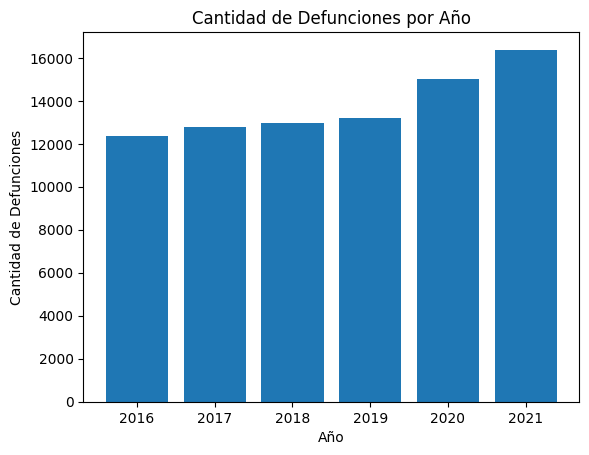

In [50]:

defunciones_por_anio = defunciones['Año'].value_counts().sort_index()
plt.bar(defunciones_por_anio.index, defunciones_por_anio.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de Defunciones')
plt.title('Cantidad de Defunciones por Año')
plt.show()

### 11. Gráfico de dispersión de Edad promedio de fallecimiento por comuna de residencia

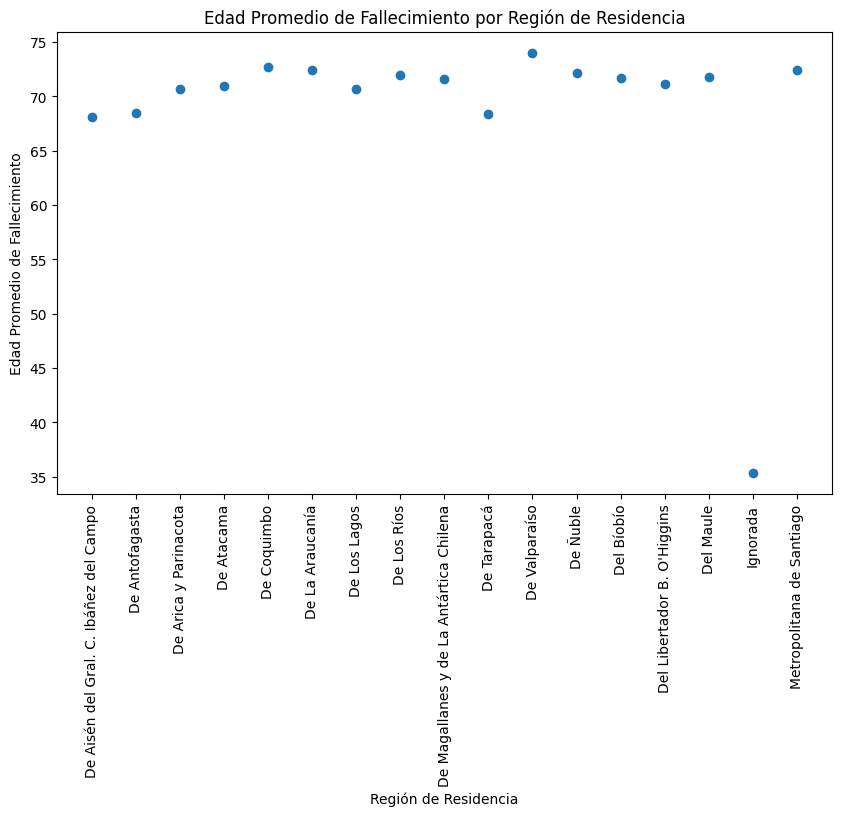

In [62]:
edad_promedio_por_comuna = defunciones.groupby('Reg_resi')['Edad_num'].mean()
plt.figure(figsize=(10, 6)) 
plt.scatter(edad_promedio_por_comuna.index, edad_promedio_por_comuna.values)
plt.xlabel('Región de Residencia')
plt.ylabel('Edad Promedio de Fallecimiento')
plt.title('Edad Promedio de Fallecimiento por Región de Residencia')
plt.xticks(rotation=90)
plt.show()

### 12. Gráfico de líneas de la evolución de la cantidad de defunciones por año

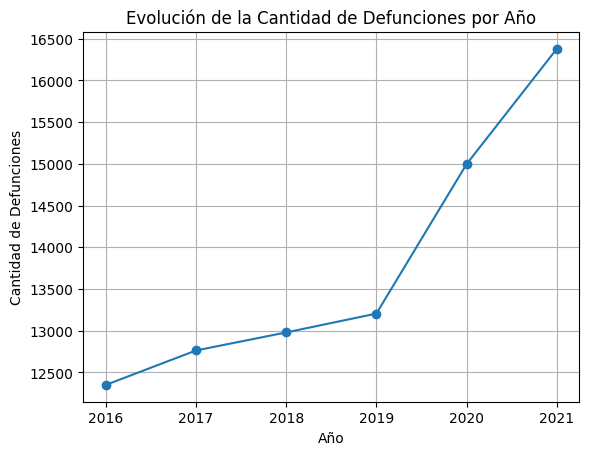

In [64]:
defunciones_por_anio = defunciones['Año'].value_counts().sort_index()
plt.plot(defunciones_por_anio.index, defunciones_por_anio.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Cantidad de Defunciones')
plt.title('Evolución de la Cantidad de Defunciones por Año')
plt.grid(True)
plt.show()

### 13. Gráfico de líneas múltiples de la evolución de la cantidad de defunciones por sexo a lo largo de los años

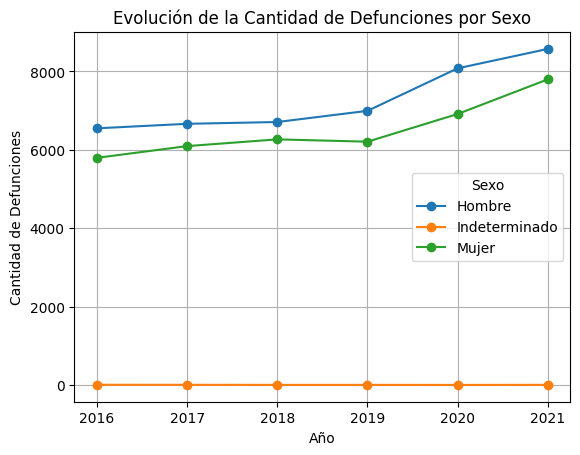

In [67]:

defunciones_por_anio_sexo = defunciones.groupby(['Año', 'Sexo']).size().unstack()
defunciones_por_anio_sexo.plot(marker='o')
plt.xlabel('Año')
plt.ylabel('Cantidad de Defunciones')
plt.title('Evolución de la Cantidad de Defunciones por Sexo')
plt.legend(title='Sexo')
plt.grid(True)
plt.show()
